# Email Spam Detection

## 1. Read Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('combined_data.csv')

## 2. Exploratory Data Analysis

In [3]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
# last 5 row of data
df.tail()

,label,text
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...
83447,1,get the most out of life ! viagra has helped m...


In [5]:
# check for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [6]:
# check duplicates
df.duplicated().sum()

0

In [7]:
# copy the DataFrame for exploratory data analysis 
eda_df = df.copy()


In [8]:
# Add a new column 'NumWords' to count the number of words in each text entry
eda_df['NumWords'] = eda_df['text'].apply(lambda x: len(x))

In [9]:
# first 5 rows of new eda_df
eda_df.head()

,label,text,NumWords
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
# # The distribution of the number of words in emails

# fig, axis = plt.subplots(figsize=(16,6))
# sns.histplot(data=eda_df, x = 'NumWords', hue='label', ax=axis,kde=True)
# axis.set_xlabel('Number of email words')
# axis.set_ylabel('Number of email')

## 3. Text Preprocessing

    - we do some basic text preprocessing like cleaning text, tokenization

In [12]:
# eexample of text
df['text'][100] # f1st email 

'author tridge date escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber fri escapenumber may escapenumber new revision escapenumber websvn http websvn samba org cgi bin viewcvs cgi view rev root samba rev escapenumber log use echo operations once a second in lockbench and openbench to ensure we detect ip takeover on servers modified branches samba escapenumber escapenumber source torture raw lockbench c branches samba escapenumber escapenumber source torture raw openbench c changeset modified branches samba escapenumber escapenumber source torture raw lockbench c branches samba escapenumber escapenumber source torture raw lockbench c escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber utc rev escapenumber branches samba escapenumber escapenumber source torture raw lockbench c escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber utc rev escapenumber escapenumber escapenumber escapenumber escapenumb

.Data like ... printf \\\\r fflush stdout event... 

- create a function for preprocessing data

In [13]:
import re

def preprocess(text): 
    message = text.lower() # convert to lovercase 
    #message = re.sub('\\\\r', ' ',message) # replace by space
    message = re.sub('[^a-zA-Z0-9]', ' ', message) # remove special characters
    message = re.sub(r'\s+', ' ', message) # remove extra spaces
    message = message.strip() # remove leading and trailing spaces

    return message
    

# stemming or lemmatization can be done here 

In [14]:
# initialize stopwords 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# remove stopwords
def remove_stopwords(text):
    words = text.split()  # split the text into words
    filtered_words = [word for word in words if word not in stop_words]  # filter out stopwords
    return ' '.join(filtered_words)  # join the words back into a string

In [15]:
# apply the preprocess function to the 'text' column
df['text'] = df['text'].apply(lambda x: preprocess(x))

In [16]:
df['text'][100] # check the text after preprocessing

'author tridge date escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber fri escapenumber may escapenumber new revision escapenumber websvn http websvn samba org cgi bin viewcvs cgi view rev root samba rev escapenumber log use echo operations once a second in lockbench and openbench to ensure we detect ip takeover on servers modified branches samba escapenumber escapenumber source torture raw lockbench c branches samba escapenumber escapenumber source torture raw openbench c changeset modified branches samba escapenumber escapenumber source torture raw lockbench c branches samba escapenumber escapenumber source torture raw lockbench c escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber utc rev escapenumber branches samba escapenumber escapenumber source torture raw lockbench c escapenumber escapenumber escapenumber escapenumber escapenumber escapenumber utc rev escapenumber escapenumber escapenumber escapenumber escapenumb

In [17]:
from nltk.tokenize import sent_tokenize

# Tokenize the text into sentences
df['text'].apply(sent_tokenize)

0        [ounce feather bowl hummingbird opec moment al...
1        [wulvob get your medircations online qnb ikud ...
2        [computer connection from cnn com wednesday es...
3        [university degree obtain a prosperous future ...
4        [thanks for all your answers guys i know i sho...
                               ...                        
83443    [hi given a date how do i get the last date of...
83444    [now you can order software on cd or download ...
83445    [dear valued member canadianpharmacy provides ...
83446    [subscribe change profile contact us long term...
83447    [get the most out of life viagra has helped mi...
Name: text, Length: 83448, dtype: object

## Text Tepresentation / Convert text into number

-  vectorization 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer

vectorizer = CountVectorizer()

This will convert the text data into a matrix of token counts

- Fitting vectorization on text

In [19]:
# Fit the vectorization
x = vectorizer.fit_transform(df['text']) # x could be stansform into a matrix
y = df['label']  # label as a nummerical no need to trainsform 

.toarray(): This method converts the sparse matrix representation obtained from fit_transform() into a dense numpy array. This array, denoted by X, contains the document-term matrix where each row represents a document (message) and each column represents a unique word in the vocabulary.

In [20]:
x.shape, y.shape 

((83448, 288398), (83448,))

- split data into train and test set

In [21]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 4. Model

#### 4.1. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# initialize LR
logistic = LogisticRegression()

In [24]:
# fit the model
logistic.fit(x_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
# predict labels for test set
y_pred = logistic.predict(x_test) 

In [27]:
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.9849610545236669

In [28]:
metrix = confusion_matrix(y_test, y_pred)
metrix

array([[7777,  161],
       [  90, 8662]], dtype=int64)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
display = ConfusionMatrixDisplay(metrix)

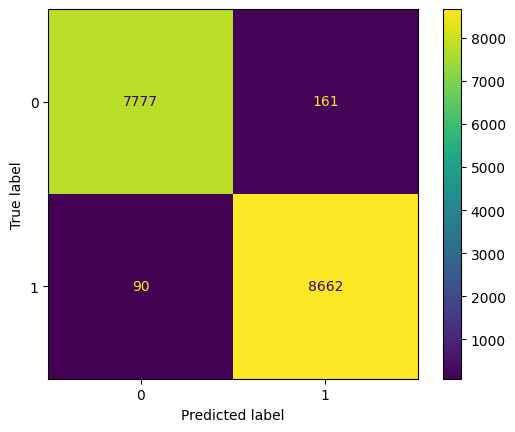

In [31]:
display.plot()

#### 4.2 Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
pred = dtree.predict(x_test)

In [43]:
dtree_acc = accuracy_score(y_test, pred)
dtree_acc  # 96

0.9618334331935291

In [44]:
metrix = confusion_matrix(y_test, pred) 
metrix

array([[7596,  342],
       [ 295, 8457]], dtype=int64)

#### 4.3 k-Nearest Neighbors(KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
kneighbors = KNeighborsClassifier(n_neighbors=3)

default n it mean n =5 

In [93]:
kneighbors.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
pred = kneighbors.predict(x_test)

In [95]:
kneighbors_acc = accuracy_score(y_test, pred)
kneighbors_acc  

0.9330736968244457

- k=3 , 0.9618334331935291
- k=1, 0.9399041342121031
- k=5, 0.9273816656680647
- k=7, 0.9243259436788496

    => k=3 is better than other k.

In [55]:
metrix = confusion_matrix(y_test, pred)
metrix

array([[7596,  342],
       [ 295, 8457]], dtype=int64)

#### 4.4 XGBoot Classifier

In [68]:
from xgboost import XGBClassifier

In [69]:
xgboost = XGBClassifier()

In [70]:
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
pred = xgboost.predict(x_test)

In [73]:
xgboost_acc = accuracy_score(y_test, pred)
xgboost_acc

0.9828639904134212

#### 4.5 Multinomial Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
multiNB = MultinomialNB()

In [76]:
multiNB.fit(x_train, y_train)

MultinomialNB()

In [77]:
pred = multiNB.predict(x_test)

In [80]:
multiNB_acc = accuracy_score(y_test, pred)
multiNB_acc

0.9760335530257639

#### 4.6 Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
forest = RandomForestClassifier()

In [83]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [85]:
prediction = forest.predict(x_test) 

In [86]:
forest_acc = accuracy_score(y_test, prediction)
forest_acc 

0.9800479328939484

In [87]:
metrix = confusion_matrix(y_test, prediction)
metrix 

array([[7824,  114],
       [ 219, 8533]], dtype=int64)

## 5. Model Comparision

In [113]:
print(" Model Accuracy Comparison")
print("+-------------------------------+----------+")
print("| Model                        | Accuracy |")
print("+-------------------------------+----------+")
print(f"| Logistic Regression          | {lr_acc:.4f}   |")
print(f"| Decision Tree                | {dtree_acc:.4f}   |")
print(f"| K-Nearest Neighbors          | {kneighbors_acc:.4f}   |")
print(f"| XGBoost                      | {xgboost_acc:.4f}   |")
print(f"| Multinomial Naive Bayes      | {multiNB_acc:.4f}   |")
print(f"| Random Forest                | {forest_acc:.4f}   |")
print("+-------------------------------+----------+")



 Model Accuracy Comparison
+-------------------------------+----------+
| Model                        | Accuracy |
+-------------------------------+----------+
| Logistic Regression          | 0.9850   |
| Decision Tree                | 0.9618   |
| K-Nearest Neighbors          | 0.9331   |
| XGBoost                      | 0.9829   |
| Multinomial Naive Bayes      | 0.9760   |
| Random Forest                | 0.9800   |
+-------------------------------+----------+


In [127]:
import plotly.express as px
import pandas as pd

# Sample data (replace with your actual accuracy values)
data = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "K-Nearest Neighbors",
        "XGBoost",
        "Naive Bayes",
        "Random Forest"
    ],
    "Accuracy": [
        lr_acc,
        dtree_acc,
        kneighbors_acc,
        xgboost_acc,
        multiNB_acc,
        forest_acc
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

fig = px.bar(
    df,
    x="Model",
    y="Accuracy",
    text="Accuracy",
    color="Model",
    title=" Accuracy Comparison of Machine Learning Models",
    labels={"Accuracy": "Accuracy Score"},
    template="simple_white"
)

# Improve appearance
fig.update_traces(
    texttemplate='%{text:.3f}',  # show 3 decimal places
    textposition='outside',
    marker_line_color='black',
    marker_line_width=1.5
)

fig.update_layout(
    title_font_size=22,
    title_x=0.5,
    xaxis_tickangle=-20,
    xaxis_title=None,
    yaxis=dict(range=[0.5, 1.05]),
    uniformtext_minsize=10,
    uniformtext_mode='show',
    showlegend=False,  # hide color legend (colors already match x labels)
    bargap=0.3
)

fig.show()


## 6. Test with new email data

In [108]:
# vectorize 
def predicEmail(email):
    email_vector = vectorizer.transform([email])
    result = dtree.predict(email_vector) # chage to a different model if needed
    return "Spam" if result[0] == 1 else "Not Spam"

In [128]:
predicEmail(e4) # test with the new email

'Spam'

In [96]:
# spam
e1 = """ Subject: Congratulations! You’ve won a $5000 Gift Card!

From: prize@luckydraw-freegift.com

Body:

Dear Winner,

You have been selected for a $5000 Walmart Gift Card!
Click here 👉 Claim Your Prize Now!

Offer valid for 24 hours only. Don’t miss out!

Best Regards,
Lucky Draw Team"""

In [99]:
# simple
e2 = """ Visual Crossing authentication code
Inbox

Visual Crossing Weather <no_reply@visualcrossing.com>
Wed, Jun 4, 4:02 PM
to me

Thank you for requesting an email authentication code for Visual Crossing.
Please enter the following authentication code when prompted: E6T84

If you have questions, please see our support page at https://support.visualcrossing.com"""

In [100]:
e3 = """Hi mr Dra,

Over the last two years, we have built Poe as a unified chat interface to all AI. We now provide millions of users with access to 100 of the best text, image, video, and audio models from leading AI companies, along with millions of bots built on top of them, all in one place.

We have learned from this experience that while chat is the right interface for many people and for many use cases, there are also many cases where a visual UI is a better interface, particularly when a single workflow involves the use of multiple models made by different companies — access that Poe can uniquely provide.

Today we are introducing Poe Apps, which make it easy to build visual interfaces on top of any combination of the existing models on Poe and custom logic expressed in JavaScript. Poe Apps can run side-by-side with chat, or be entirely visual. Thanks to the integration with Poe, when these apps need to make potentially-expensive model calls, they will use the user's existing points, so that as a creator, you don't have to risk ending up with huge API bills, or having downtime when your app hits limits.

You can create a Poe App without writing any code, thanks to App Creator, which we built on top of Claude 3.7 Sonnet. Or, if vibe coding is not for you, you can take full control of the underlying HTML and JavaScript. Either way, we'll be giving distribution to the best apps within Poe through the existing systems we have built out for bots. This means our millions of users are all your potential audience, with no extra work required on your part.

Here are some examples we created to better illustrate this product:
Chibify: An app that transforms one or more photos into 3D anime style art, using GPT-4o and FLUX-Pro-1.1.
MagicErase: An app that removes unwanted objects from images, using Bria-Eraser.
MemeGenBattle: An app that lets you compare memes generated by LLMs of your choosing.
These are just a few examples, but we expect a wide diversity of products to be created because Poe Apps can build on all the models on Poe. This includes the newest reasoning models, including o3-mini, Claude 3.7 Sonnet, and DeepSeek R1, multimodal text generation models like Gemini 2 and GPT-4o, image generation models like FLUX Pro 1.1, Imagen 3, Ideogram v2, Playground v3, and DALL-E 3, video generation models like Veo 2, Pika 2.0, Hunyuan Video, Kling Pro 1.5, and Hailuo Live, and audio generation models like ElevenLabs and Cartesia.

Starting today, Poe Apps are available on web, with iOS and Android support coming in the near future. You can get started with App Creator here.

This is an early launch and we have a long roadmap ahead to give creators even more power, including the ability to earn money directly from their apps. We are excited to see what you all create. And we are excited to see how much better we are able to make Poe Apps as the models continue to get better at writing code this year.

Please share any feedback with us at feedback@poe.com.

Thank you!
The Poe Team"""


e4 = """Meet Gemini, your new AI assistant
Welcome to Gemini, your upgraded AI assistant from Google that can help you supercharge your creativity and productivity. Gemini can not only provide the hands-free help that you love from Google Assistant, but can go far beyond in conversationality and richness of the tasks it can help with. With Gemini on your phone, you can now have a natural, free-flowing voice conversation through Gemini Live1, and get help writing, creating, learning, and more. Gemini will now serve as your Android device’s primary assistant. Learn more about what you can do with Gemini.
If you wish to switch your device’s primary assistant to Google Assistant, you can do that in Settings. How to switch.
How Gemini handles data and works with other services
Gemini uses info from your devices and services to help you
Gemini uses info from your devices and services to provide more customized and context-aware assistance. Gemini accesses certain system permissions and data (including through Google Assistant), like call and message logs, contacts (to help you keep in touch), and screen content (to help you act on it).
Gemini works with Google Assistant
Gemini gets help from Google Assistant for certain actions. When that happens, relevant Assistant settings such as Personal Results apply. When Gemini handles actions directly through connected apps that integrate to other services like Maps or YouTube, those Google Assistant settings won’t apply. Learn more.
Gemini can use apps
Gemini can respond with real-time info from other tools, apps, and services like Google Maps and YouTube. You can also choose to connect services like Google Workspace and YouTube Music. If Gemini finds a connected app that can help, it will send information from your conversation and other relevant information to that connected app to help it generate a better response. You can manage your apps in your settings.2 Learn more.
Things to know when speaking to Gemini
If “Hey Google” & Voice Match (powered by Google Assistant) are on in Settings, you can talk to your assistant hands-free. Gemini may activate when you didn’t intend it to, for example, if it detects a noise like “Hey Google,” or if you accidentally activate it by touch. If Gemini responds, it will treat your input like a normal activation.
Gemini responses on lock screen
Gemini helps you with answers and actions even when your device is locked. To protect your privacy, Gemini will still require you to unlock for some actions, for example when responses contain your personal content from apps (such as calendar events). You can change your Gemini on lock screen settings. Learn more.
Gemini activity and your choices
When you use Gemini, Google collects your activity, like your chats (including recordings of your Gemini Live interactions), what you share with Gemini (like files, images, and screens), related product usage information, your feedback, and info about your location. Some of your activity is used to improve Google AI and services with help from trained reviewers by default. You can change this and manage your activity in Gemini Apps Activity. Don’t enter info you wouldn’t want reviewed or used. Learn more.
Note: Google Terms apply to Gemini Apps. Google will process your data as described in the Google Privacy Policy and the Gemini Apps Privacy Notice. Gemini can make mistakes, including about people, so double-check it."""

## 7. Conclusion

In this project, we developed a spam email detection system using Natural Language Processing (NLP) techniques (vectorization, tokenization) combined with six supervised machine learning models: Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), XGBoost, Multinomial Naive Bayes, and Random Forest.

Each model was trained and evaluated using accuracy as the primary metric. The results are as follows:



In [125]:
print(" Model Accuracy Comparison")
print("+-------------------------------+----------+")
print("| Model                        | Accuracy |")
print("+-------------------------------+----------+")
print(f"| Logistic Regression          | {lr_acc:.4f}   |")
print(f"| Decision Tree                | {dtree_acc:.4f}   |")
print(f"| K-Nearest Neighbors          | {kneighbors_acc:.4f}   |")
print(f"| XGBoost                      | {xgboost_acc:.4f}   |")
print(f"| Multinomial Naive Bayes      | {multiNB_acc:.4f}   |")
print(f"| Random Forest                | {forest_acc:.4f}   |")
print("+-------------------------------+----------+")

 Model Accuracy Comparison
+-------------------------------+----------+
| Model                        | Accuracy |
+-------------------------------+----------+
| Logistic Regression          | 0.9850   |
| Decision Tree                | 0.9618   |
| K-Nearest Neighbors          | 0.9331   |
| XGBoost                      | 0.9829   |
| Multinomial Naive Bayes      | 0.9760   |
| Random Forest                | 0.9800   |
+-------------------------------+----------+



From the results, we observe that all models performed well in distinguishing between spam and non-spam emails. However, Logistic Regression achieved the highest accuracy of 98.50%, making it the most effective model for this task in our dataset. It is followed closely by XGBoost (98.29%) and Random Forest (98.00%).